In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
train = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv")
train["date"] = pd.to_datetime(train["date"])
train.groupby("family")["sales"].sum().sort_values()

family
BOOKS                             6438.000
BABY CARE                        10051.000
HOME APPLIANCES                  41601.000
HARDWARE                        103470.000
MAGAZINES                       266359.000
SCHOOL AND OFFICE SUPPLIES      269316.000
BEAUTY                          337893.000
PET SUPPLIES                    356584.000
LAWN AND GARDEN                 548842.000
AUTOMOTIVE                      554822.000
PLAYERS AND ELECTRONICS         562608.000
LADIESWEAR                      651159.000
LINGERIE                        653114.000
CELEBRATION                     761177.000
HOME AND KITCHEN II            1520670.000
HOME AND KITCHEN I             1861491.000
GROCERY II                     1962767.000
SEAFOOD                        2015431.883
LIQUOR,WINE,BEER               7746640.000
PREPARED FOODS                 8799895.117
FROZEN FOODS                  14073887.720
EGGS                          15588296.000
HOME CARE                     16022744.000
DELI

In [4]:
df = train[train["family"] == "GROCERY I"][["date", "sales"]]
df["time"] = np.arange(len(df.index))
df.head()

,date,sales,time
12,2013-01-01,0.000,0
45,2013-01-01,0.000,1
78,2013-01-01,0.000,2
111,2013-01-01,0.000,3
144,2013-01-01,0.000,4


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/tmp/ipykernel_20/1278745114.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


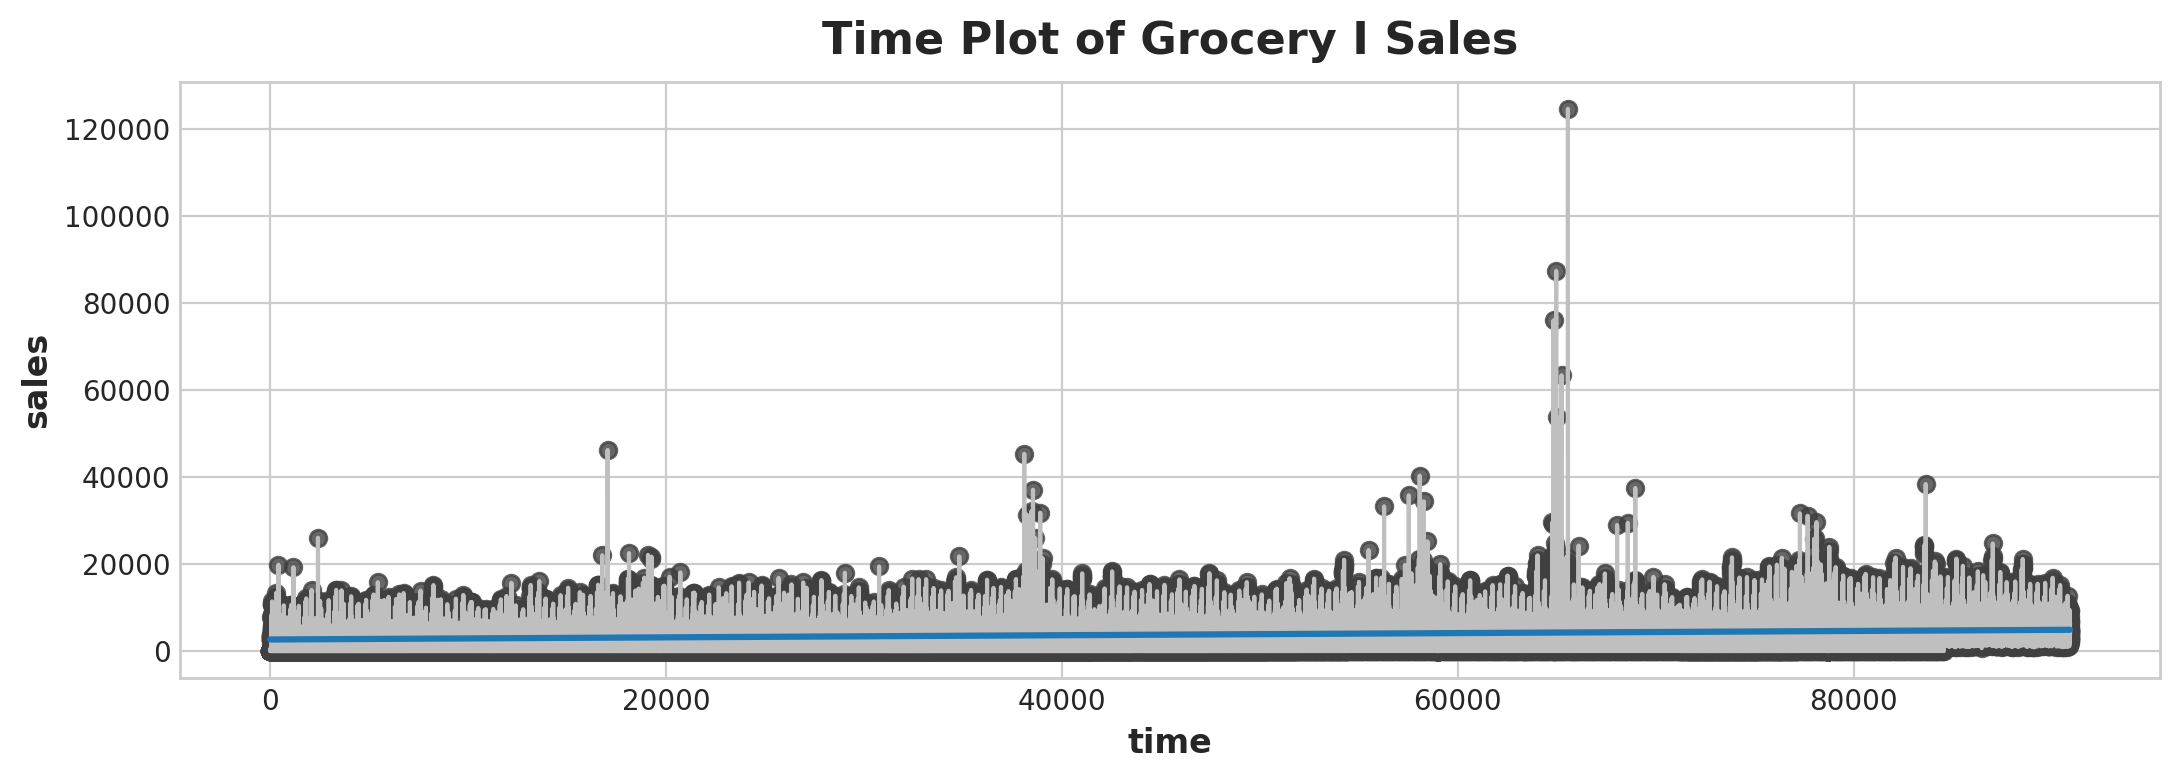

In [6]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('time', 'sales', data=df, color='0.75')
ax = sns.regplot(x='time', y='sales', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Grocery I Sales');

In [7]:
df["lag_1"] = df['sales'].shift(1)
df.index = df['date']
df = df.reindex(columns=['sales', 'lag_1'])
df.head()

,sales,lag_1
date,,
2013-01-01,0.000,NaN
2013-01-01,0.000,0.000
2013-01-01,0.000,0.000
2013-01-01,0.000,0.000
2013-01-01,0.000,0.000


Text(0.5, 1.0, 'Lag Plot of Grocery I Sales')

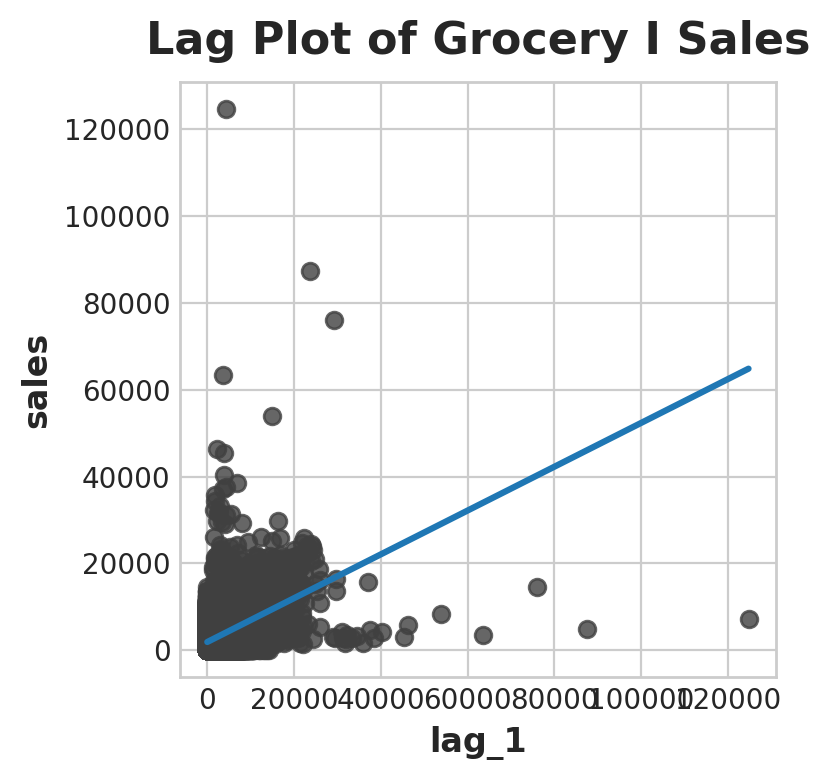

In [8]:
fig, ax = plt.subplots()
ax = sns.regplot(x='lag_1', y='sales', data=df, 
                 ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Grocery I Sales')